In [1]:
#   ---------------------------------------        IMPORTS     ------------------------------------------
from CrearDataset import crearDataLoaders
from Modelos import XopiNet
from Entrenamiento import entrenamiento
from Evaluacion import evaluacion
from MostrarResultados import mostrarCelulaEjemplo

import torch.cuda

cpu
40 10


In [2]:
#   ---------------------------------------        GPU          ------------------------------------------

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
#   ----------------------------------        DATALOADER     ------------------------------------

# Elegimos el tamaño del batch a 1 debido a que nuestro dataset no tiene muchos datos
train_loader, valid_loader = crearDataLoaders(BATCH_SIZE=1)

imgs, masks = next(iter(train_loader))
print(imgs.shape, masks.shape)

torch.Size([1, 3, 224, 224]) torch.Size([1, 1, 224, 224])


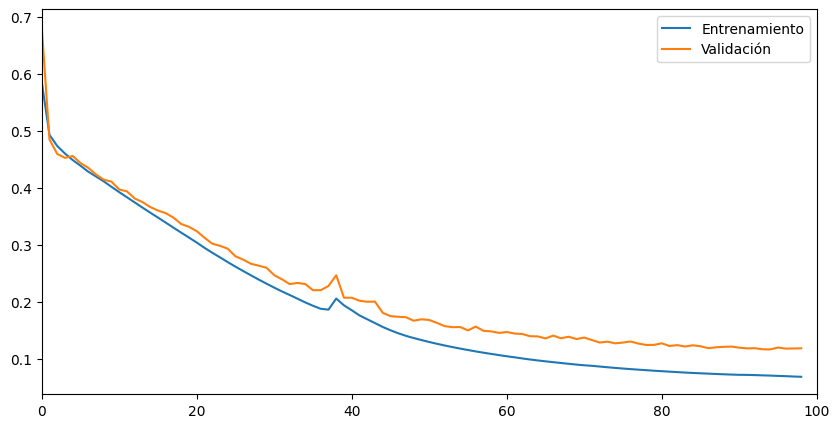

Epoch:100 Training Loss:0.06740345060825348 Validation Loss:0.11820840835571289:


In [4]:
#   ----------------------------------        ENTRENAMIENTO     ------------------------------------
# Nuestro modelo es la XopiNet, que añade un nivel más de profundidad
model = XopiNet().to(device)
entrenamiento(model, device,train_loader, valid_loader, "pesos_XOPINET.pt")

In [5]:
#   ----------------------------------        EVALUACIÓN     ------------------------------------

mmodel =  XopiNet().to(device)
mmodel.load_state_dict(torch.load("pesos_XOPINET.pt"))
mmodel.eval() # Configuramos el modelo para la evaluación

evaluacion(mmodel, device, valid_loader)


DiceScore entrenamiento promedio: 0.8817915916442871
Iou entrenamiento promedio: 0.7894644320011139


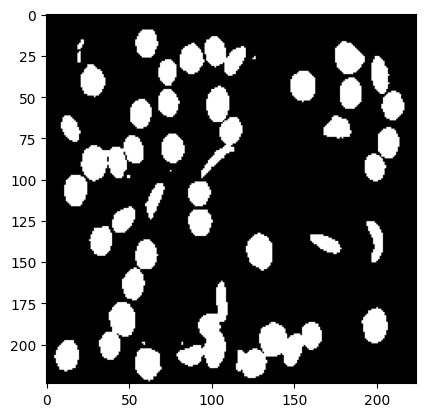

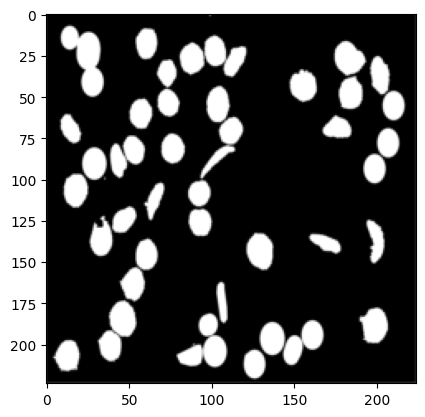

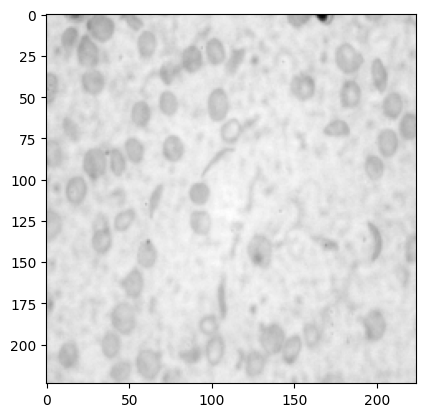

In [6]:
#   ------------------------------------        MOSTRAR RESULTADOS      ------------------------------------

mostrarCelulaEjemplo(mmodel, valid_loader)
# Primera imagen: Máscara predicha
# Segunda imagen: Máscara original
# Tercera imagen: Imagen original